In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import  SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1 

In [2]:
X,y = make_friedman1(n_samples=10000,n_features=5,noise=1.0,random_state=42)

In [3]:
print(X.shape,y.shape)

(10000, 5) (10000,)


In [4]:
import pandas as pd 
df =pd.DataFrame(X,columns=['X1','X2','X3','X4','X5'])
df['y'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10000 non-null  float64
 1   X2      10000 non-null  float64
 2   X3      10000 non-null  float64
 3   X4      10000 non-null  float64
 4   X5      10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [5]:
lowest_mse = []
X = df.drop(columns=['y'])
y = df['y']
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

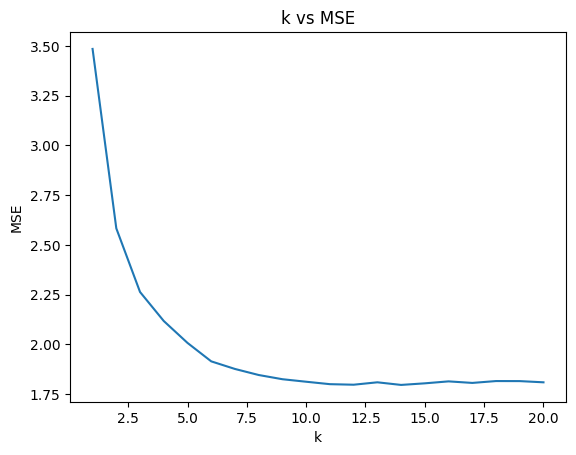

Best value of k = 14


In [6]:
best_mse = []
for k in range(1,21):
    knr=KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds = knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,21),best_mse)
plt.title("k vs MSE")
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

best_k = range(1,21)[np.argmin(best_mse)]
print(f'Best value of k = {best_k}')

In [ ]:
best_mse = []
for k in range(1,5):
    knr=KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds = knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,5),best_mse)
plt.title("k vs MSE")
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

best_k = range(1,5)[np.argmin(best_mse)]
print(f'Best value of k = {best_k}')

MSE =1.7961
MSE =1.0566
R^2 Score = 0.9251


In [10]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_preds = dtr.predict(X_test)
print (f"MSE ={mean_squared_error(y_test,y_preds):.4f}")
print (f"MSE ={mean_absolute_error(y_test,y_preds):.4f}")
print (f"R^2 Score = {r2_score(y_test, y_preds):.4f}")


MSE =4.7581
MSE =1.7070
R^2 Score = 0.8017


In [12]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_preds = dtr.predict(X_test)
print (f"MSE ={mean_squared_error(y_test,y_preds):.4f}")
print (f"MSE ={mean_absolute_error(y_test,y_preds):.4f}")
print (f"R^2 Score = {r2_score(y_test, y_preds):.4f}")


MSE =4.7581
MSE =1.7070
R^2 Score = 0.8017


In [13]:
from timeit import default_timer as Timer
mlp = MLPRegressor(hidden_layer_sizes=(500,500,500,500),max_iter=2000)
start = Timer()
mlp.fit(X_train,y_train)
end = Timer()
y_preds = dtr.predict(X_test)
print(f"Time taken is {end-start} second")
print (f"MSE ={mean_squared_error(y_test,y_preds):.4f}")
print (f"MSE ={mean_absolute_error(y_test,y_preds):.4f}")
print (f"R^2 Score = {r2_score(y_test, y_preds):.4f}")


Time taken is 53.146104899999955 second
MSE =4.7581
MSE =1.7070
R^2 Score = 0.8017
